### Data information 

The data we are using here is auto mpg data set which obtained in 1963 from the American Statistical Association.it describes various engine parameters related to fuel consumption in various car models from 1970-1982.


Importing libraries : 
NumPy, Pandas, Matplotlib, Seaborn and SciPy libraries are used to explore the dataset. 

In [1]:
#importe packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
import seaborn as sns 
    


Import data: We also import a dataset for analysis with name auto-mpg.csv 

In [2]:
# import cars data
filepath = '../Uppgift/Data/auto-mpg.csv'
cars = pd.read_csv(filepath)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
cars.shape

(398, 9)

The number of instances and attributes in dataset are 398 and 9


In [4]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Description of total number of columns present in dataset.  
- mpg : Miles or mileage per gallon which represents the fuel consumption of car.
- cylinders: Contains the number of cyinders present in car where fuel is combusted to generate the power.
- displacement: Overall volume of air displased by the engine (cubic inches).
- horsepower: Indicates the power of engine (horsepower).
- weight: Gross weight of car (pounds).
- acceleration: increasing speed- time to go 0-60 mph(seconds).
- model_year: year of the car model.
- origin: country of manufacture of car.
- name: Name of the car- model designation.

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

From above dataset there are 6 NAN values are present in horsepower.

In [7]:
cars = cars.dropna() # Pick out rows that contain NaN
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## Descriptive statistics

#### Mode:
Mode is the value that appears more frequently in our dataset.We can calculate mode in Pandas through the function  <code>.mode()</code>

In [8]:
cars['origin'].mode() # calculate mode using Pandas

0    usa
Name: origin, dtype: object

In [9]:
cars['origin'].value_counts() # calculate mode using  NumPy

usa       245
japan      79
europe     68
Name: origin, dtype: int64

### Median:
Median is the middle value in a sorted list.The median can be calculated directly in Pandas with the <code>median()</code> function.
- If there is an odd amount of numbers present in dataset, then median is the middle value.
- If there is an even amount of numbers present in dataset, then median is the average of two middle values.

Let's calculate the median of the miles per gallon (mpg).


In [10]:
cars['mpg'].median() # calculate median using Pandas

22.75

In [11]:
np.median(cars['mpg']) # numpy

22.75

####  What is the average fuel efficiency of cars in the dataset?

### Mean:
Mean is the average of a data set, i.e. the sum of all values ​​divided by how many values ​​are in the data set.

${\bar x}=\frac{1}{n}\sum_{i=1}^{n}x_i=\frac{x_1+\dots+x_n}{n}$

In [12]:
cars['mpg'].mean() # calculate mean using Pandas

23.445918367346938

In [13]:
np.mean(cars['mpg']) # calculate mean using NumPy

23.445918367346938

### Variance:
The variance is a measurement of spread between numbers in a dataset.

$\,\,\,\,\,\,\,\,\,s^2=\frac{1}{n-1}\sum_{i=1}^{n}\left(x_i-{\bar x}\right)^2$

We use $n-1$ degrees of freedom when calculating on samples, and $n$ degrees of freedom when calculating on populations. In practice, it is almost never possible to count on populations, therefore the formula $n-1$ will be by far the most common one we encounter. 


Variance can be calculated in Pandas with the <code>var()</code> function. What is the sample variance of miles per gallon (mpg) in the data set ?


In [14]:
cars['mpg'].var() # calculate variance using Pandas

60.91814186544184

In [15]:
np.var(cars['mpg'],ddof=1) # ddof in this context stands for 'delta degrees of freedom'.

60.91814186544184

### Standard deviation:
It is a measure of amount of variation or dispersion of set of data.The standard deviationvis the root of the variance : $s=\sqrt{s^2}$

Pandas also has a built-in function for standard deviation <code>std()</code> here.

In [16]:
cars['mpg'].std()# calculate standard deviation using Pandas

7.8050074865717995

In [17]:
np.std(cars['mpg'],ddof=1) # with NumPy

7.8050074865717995

Pandas has a practical function called <code>describe()</code>. This function decribes the statstics of each column of dataset.


In [18]:
cars_stat= cars.loc[:, 'mpg':'model_year']
cars_stat.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70


In [19]:
cars_stat.describe().apply(lambda x:x.apply('{0:.2f}'.format)).T # Calculate descriptive metrics in Pandas..

,count,mean,std,min,25%,50%,75%,max
mpg,392.00,23.45,7.81,9.00,17.00,22.75,29.00,46.60
cylinders,392.00,5.47,1.71,3.00,4.00,4.00,8.00,8.00
displacement,392.00,194.41,104.64,68.00,105.00,151.00,275.75,455.00
horsepower,392.00,104.47,38.49,46.00,75.00,93.50,126.00,230.00
weight,392.00,2977.58,849.40,1613.00,2225.25,2803.50,3614.75,5140.00
acceleration,392.00,15.54,2.76,8.00,13.78,15.50,17.02,24.80
model_year,392.00,75.98,3.68,70.00,73.00,76.00,79.00,82.00


Let's make a histogram of the selected columns in our dataset.A graphical way to examine skewness is to compare the mean with the median.
- If the mean is greater than the median, the distribution is skewed to the right. 
ice versa,
- If the mean is less than the median, the distribution is skewed to the left.

 

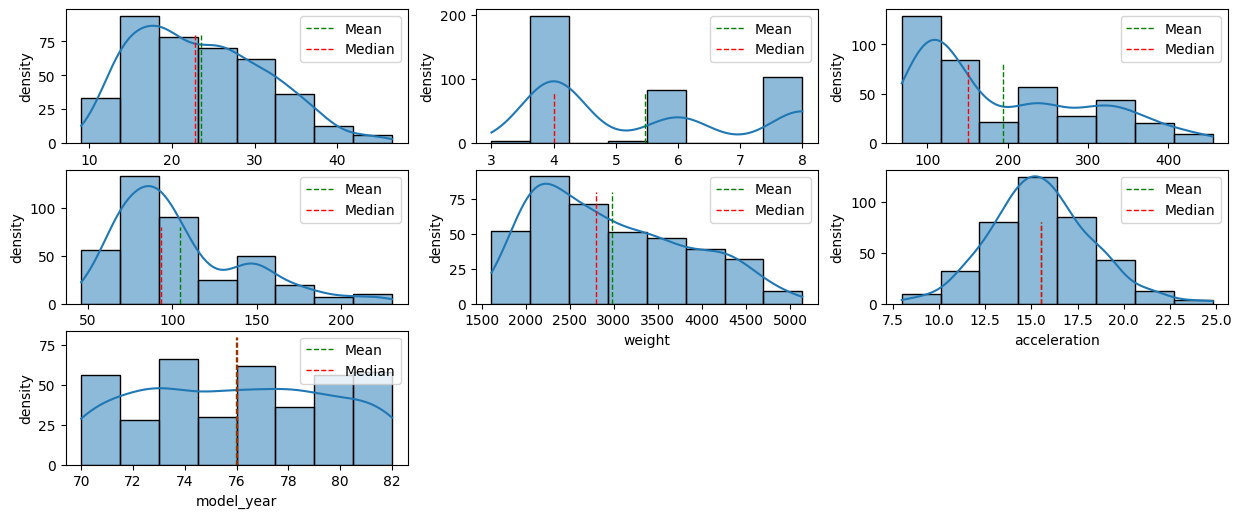

In [20]:
### Grundplot
fig = plt.figure(figsize=(15,8))

for i, col in enumerate(cars_stat.columns):

    ax=plt.subplot(4,3,i+1)
    sns.histplot(cars_stat,x= col,bins=8, kde=True) # plot the histogram with 8 bins
    
    ### Mean och median
    mean = cars_stat[col].mean() # calculate mean for cars sats data
    median = cars_stat[col].median() # calculate median for cars sats data
    ax.plot([mean, mean], [0, 80], color='green', linestyle='--', linewidth=1, label='Mean') # Plot mean value of car_stat with dashed green line
    ax.plot([median, median], [0, 80], color='red', linestyle='--', linewidth=1, label='Median') # Plot median value of car_stat with dashed gred line
    ax.set_xlabel(col)
    ax.set_ylabel("density")
    
    ### Legend
    leg = ax.legend(loc='upper right') # Draw legend for mean and median in upper right corner
plt.show()

Summary:

- mpg , cylinders,displacement,horsepower, weight: The mean is greater than the median so the distribution is thus skewed to the right, and should have a positive skewness value.So small number of cars have high amount of horsepower, high weight, high displacement values.
- Most of the cars in the data has 4 cylinders.
- The acceleration of the cars in the data is normally distributed.






In [21]:
cars_stat.skew()# Beräkna skevhet med Pandas

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model_year      0.019688
dtype: float64

In [22]:
skewness = scs.skew(cars_stat)
skewness

array([0.45534138, 0.50616287, 0.69898128, 1.08316116, 0.51759535,
       0.29046997, 0.01961288])

Theoritically tested:

skewness = 0: normally distributed

skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution. 


#### How does the year of cars manufacture in different countries impacts its fuel efficiency?

In [23]:
cars.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [24]:
car_model = cars.groupby(by=['model_year','origin'])[['mpg']].mean().reset_index() # calculate average mpg value for each model 
car_model.head()

,model_year,origin,mpg
0,70,europe,25.200000
1,70,japan,25.500000
2,70,usa,15.272727
3,71,europe,28.750000
4,71,japan,29.500000


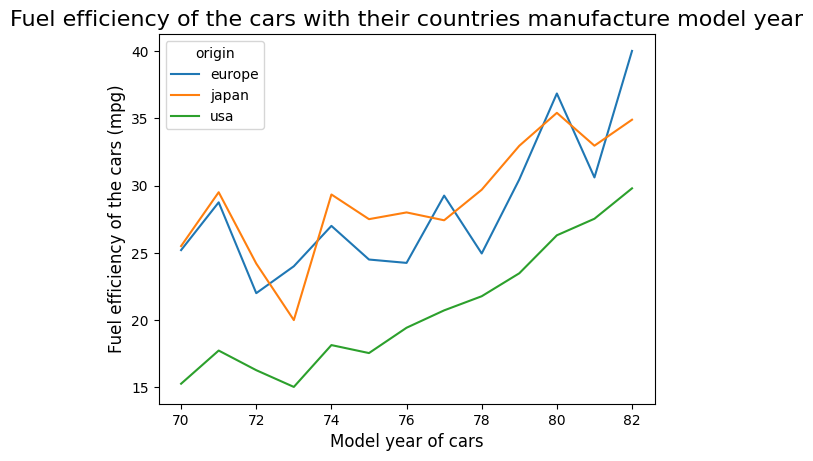

In [25]:
# Plot the graph that relates the countries of cars with their manufacture year how it effects fuel efficiency

model_plot=sns.lineplot( data = car_model,x="model_year", y="mpg",hue="origin") # Plot model year of cars aganist efficency of fuel with lineplot
model_plot.axes.set_title("Fuel efficiency of the cars with their countries manufacture model year",fontsize=16) # To set the tittle 
 
model_plot.set_xlabel("Model year of cars", fontsize=12) # set x label to model of cars
 
model_plot.set_ylabel("Fuel efficiency of the cars (mpg)",fontsize=12) # set y label to mpg
plt.show()

Data contains three countires that manufacture the cars in the year 1970-1982.
- Fuel efficiency of the cars manufactured by USA are always less compared to other two countries
- Japan cars has greater fuel efficiency than Europe on the begining and also have slight ups and downs on their manufacture.
- Europe has more ups and downs but has more fuel efficiency on 1982.

So cars that are manufactured in the year 1982 have better fuel efficiency than in the year 1970.


#### How does number of cylinders in cars affects its fuel efficiency?

In [26]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


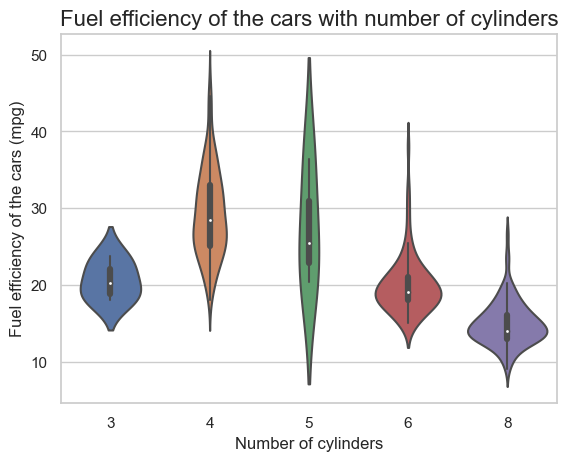

In [27]:

sns.set(style = 'whitegrid') # use to set style of background of plot
ax = sns.violinplot(x="cylinders", y="mpg", data=cars)
ax.set_title("Fuel efficiency of the cars with number of cylinders",fontsize=16) # To set the tittle 
 
ax.set_xlabel("Number of cylinders", fontsize=12) # set x label to no. of car cylinders
 
ax.set_ylabel("Fuel efficiency of the cars (mpg)",fontsize=12) # set y label to mpg
plt.show()

The average fuel efficiency of cars is more for cars with 4 cylinders.